<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/main/utubeanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [23]:
!python -m pip install wordcloud

In [56]:
!pip install emoji

     |████████████████████████████████| 170 kB 13.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=df9a4abe6589cad9b99c0662d7bc2ab167206dc618027b16d3ad9797942d05ee
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [3]:
from textblob import TextBlob

In [5]:
df = pd.read_csv('GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [6]:
df.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [8]:
TextBlob('Its more accurate to call it the M+ (1000) be.').sentiment.polarity

0.45000000000000007

In [9]:
df.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [12]:
polarity = []

for i in df['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
df['polarity'] = polarity

In [15]:
df.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

In [17]:
df_positive = df[df['polarity'] == 1]

In [19]:
df_positive.shape

(20400, 5)

In [25]:
from wordcloud import WordCloud, STOPWORDS

In [26]:
stopwords = set(STOPWORDS)

In [27]:
total_comments = ' '.join(df_positive['comment_text'])

In [29]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

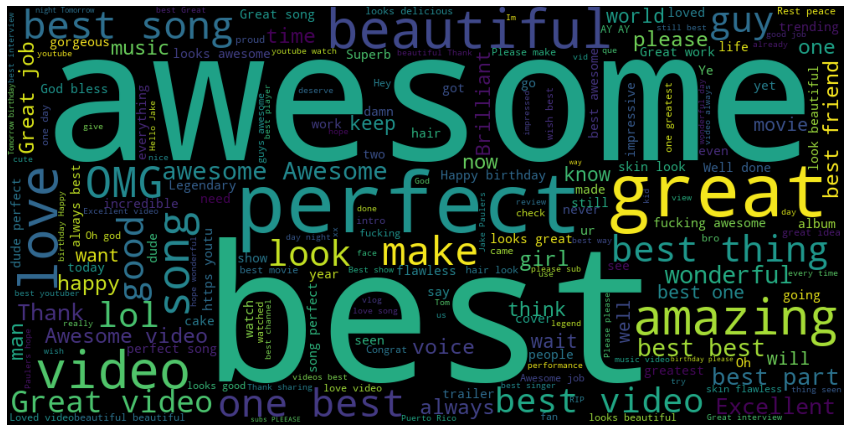

In [31]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [32]:
df_negative = df[df['polarity'] == -1]

In [33]:
total_comments = ' '.join(df_negative['comment_text'])

In [34]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

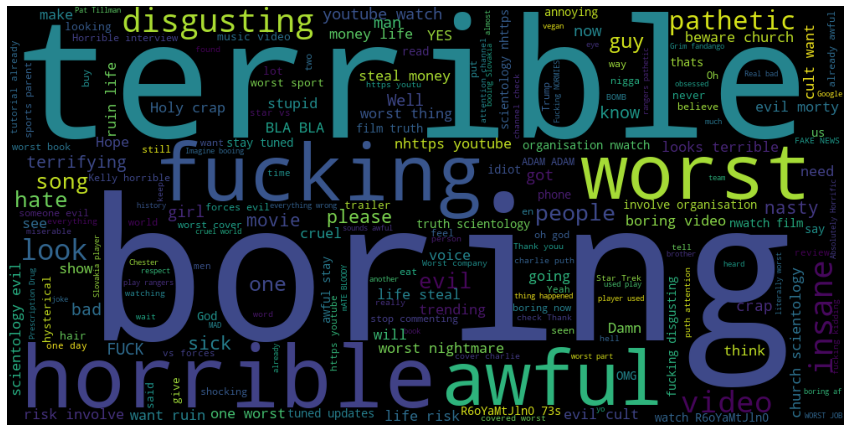

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [37]:
videos = pd.read_csv('USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [38]:
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [40]:
tags_complete = ' '.join(videos['tags'])

In [41]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [44]:
tags = re.sub('[^a-zA-Z]', ' ',tags_complete)

In [45]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [46]:
tags = re.sub(' +',' ',tags)

In [47]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [48]:
wordcloud = WordCloud(width=1000, height= 500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

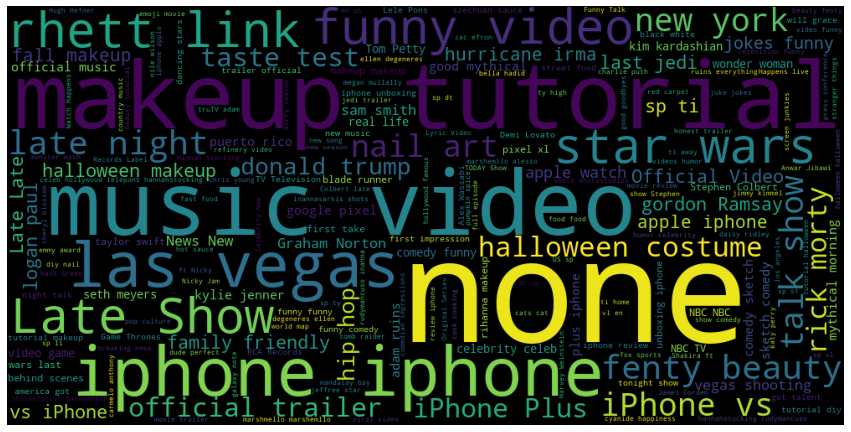

In [49]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'regression plot  for views and likes')

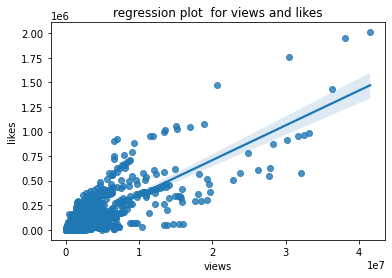

In [50]:
sns.regplot(data=videos, x='views',y='likes')
plt.title('regression plot  for views and likes')

Text(0.5, 1.0, 'regression plot  for views and dislikes')

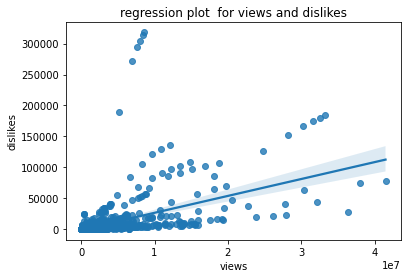

In [51]:
sns.regplot(data=videos, x='views',y='dislikes')
plt.title('regression plot  for views and dislikes')

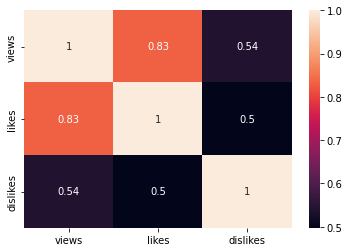

In [53]:
df_corr = videos[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

In [54]:
df.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

In [57]:
import emoji

In [58]:
len(df)

718424

In [69]:
comment = df['comment_text'][1]

[c for c in comment if c in emoji.UNICODE_EMOJI['en']]

['😂', '😂', '😂']

In [67]:
str = ''

for i in df['comment_text'].dropna():
  list = [c for c in i if c in emoji.UNICODE_EMOJI['en']]

  for ele in list:
    str = str + ele

In [68]:
len(str)

333278

In [71]:
result = {}
for i in set(str):
  result[i] = str.count(i)

In [72]:
result

{'🔺': 20,
 '🛃': 6,
 '📆': 8,
 '🥜': 1,
 '🛠': 6,
 '➗': 11,
 '👧': 163,
 '🙌': 2734,
 '🚁': 5,
 '🏅': 54,
 '🚄': 6,
 '🤙': 171,
 '🔥': 10249,
 '✍': 25,
 '👣': 83,
 '🔀': 6,
 '🆔': 5,
 '🕴': 6,
 '🦆': 4,
 '🍛': 23,
 '💘': 739,
 '🚼': 17,
 '🍊': 26,
 '⚪': 56,
 '📗': 9,
 '🚈': 6,
 '🐾': 87,
 '🖤': 802,
 '🔠': 5,
 '🗳': 5,
 '✡': 5,
 '🆖': 5,
 '🕦': 7,
 '😡': 473,
 '🎾': 14,
 '🔘': 7,
 '🔻': 23,
 '🌖': 20,
 '⏫': 6,
 '🍡': 30,
 '🕓': 11,
 '🙁': 210,
 '🔌': 34,
 '🍑': 71,
 '🌰': 54,
 '💚': 2138,
 '🎒': 20,
 '☁': 71,
 '🦌': 6,
 '😿': 127,
 '🌵': 42,
 '🗻': 11,
 '🤧': 107,
 '🚘': 10,
 '🆑': 8,
 '🦎': 8,
 '〰': 295,
 '🚰': 10,
 '💓': 1579,
 '🥂': 33,
 '👐': 127,
 '💧': 59,
 '💅': 166,
 '😦': 109,
 '🤱': 2,
 '🕤': 7,
 '💢': 17,
 '👋': 234,
 '🎭': 29,
 '🔑': 36,
 '🎺': 52,
 '⚡': 196,
 '🌂': 7,
 '🛥': 5,
 '🌫': 5,
 '❇': 11,
 '🐎': 22,
 '🐺': 125,
 '⚠': 81,
 '🔋': 22,
 '🔸': 88,
 '😚': 583,
 '🌕': 34,
 '♠': 5,
 '📌': 11,
 '⏹': 4,
 '🥀': 26,
 '🎻': 30,
 '🦍': 4,
 '🔈': 7,
 '😗': 304,
 '🍶': 17,
 '🔓': 17,
 '🚇': 6,
 '💵': 118,
 '⌚': 31,
 '😝': 417,
 '🆗': 12,
 '⌛': 12,
 '🧙': 6,
 '🔨':

In [73]:
final = {}

for key, value in sorted(result.items(),key = lambda item: item[1] ):
  final[key] = value

In [74]:
final

{'🥜': 1,
 '🤺': 1,
 '🥌': 1,
 '🥟': 1,
 '🤾': 1,
 '🥨': 1,
 '🧤': 1,
 '🥡': 1,
 '🤽': 1,
 '🛒': 1,
 '🦏': 1,
 '🤹': 1,
 '🧣': 1,
 '🛷': 1,
 '🤟': 1,
 '🧠': 1,
 '🥚': 1,
 '🦓': 1,
 '🤱': 2,
 '🧒': 2,
 '🧝': 2,
 '🦔': 2,
 '🥅': 2,
 '🦕': 2,
 '🧢': 2,
 '🧛': 2,
 '🎌': 2,
 '🦖': 2,
 '🧡': 2,
 '🧘': 2,
 '🤨': 3,
 '🥄': 3,
 '🥖': 3,
 '🧐': 3,
 '🤯': 3,
 '🤫': 3,
 '🦆': 4,
 '⏹': 4,
 '🦍': 4,
 '⚙': 4,
 '🗂': 4,
 '⚗': 4,
 '⏏': 4,
 '🥝': 4,
 '🦐': 4,
 '🥈': 4,
 '🛣': 4,
 '☸': 4,
 '🖍': 4,
 '⚧': 4,
 '🤵': 4,
 '♾': 4,
 '🖇': 4,
 '🤬': 4,
 '🧟': 4,
 '💹': 4,
 '⏯': 4,
 '🗄': 4,
 '♟': 4,
 '🛬': 4,
 '🗓': 4,
 '🏌': 4,
 '⏸': 4,
 '⏲': 4,
 '☦': 4,
 '🏷': 4,
 '🥞': 4,
 '🛢': 4,
 '🚁': 5,
 '🆔': 5,
 '🔠': 5,
 '🗳': 5,
 '✡': 5,
 '🆖': 5,
 '🛥': 5,
 '🌫': 5,
 '♠': 5,
 '🛋': 5,
 '🆎': 5,
 '🤮': 5,
 '🖲': 5,
 '🚎': 5,
 '➿': 5,
 '🚠': 5,
 '🔂': 5,
 '🧖': 5,
 '🔣': 5,
 '🔚': 5,
 '🈴': 5,
 '🏮': 5,
 '🧜': 5,
 '🔡': 5,
 '🈲': 5,
 '🈹': 5,
 'Ⓜ': 5,
 '🔳': 5,
 '🔼': 5,
 '🔢': 5,
 '🚻': 5,
 '↪': 5,
 '🥉': 5,
 '↖': 5,
 '♦': 5,
 '🔖': 5,
 '🈁': 5,
 '🚉': 5,
 '⛩': 5,
 '◽': 5,
 '🚛': 5,
 '🛤': 5,
 '⚒': 5,
 

In [75]:
keys = [*final.keys()]

In [76]:
keys

['🥜',
 '🤺',
 '🥌',
 '🥟',
 '🤾',
 '🥨',
 '🧤',
 '🥡',
 '🤽',
 '🛒',
 '🦏',
 '🤹',
 '🧣',
 '🛷',
 '🤟',
 '🧠',
 '🥚',
 '🦓',
 '🤱',
 '🧒',
 '🧝',
 '🦔',
 '🥅',
 '🦕',
 '🧢',
 '🧛',
 '🎌',
 '🦖',
 '🧡',
 '🧘',
 '🤨',
 '🥄',
 '🥖',
 '🧐',
 '🤯',
 '🤫',
 '🦆',
 '⏹',
 '🦍',
 '⚙',
 '🗂',
 '⚗',
 '⏏',
 '🥝',
 '🦐',
 '🥈',
 '🛣',
 '☸',
 '🖍',
 '⚧',
 '🤵',
 '♾',
 '🖇',
 '🤬',
 '🧟',
 '💹',
 '⏯',
 '🗄',
 '♟',
 '🛬',
 '🗓',
 '🏌',
 '⏸',
 '⏲',
 '☦',
 '🏷',
 '🥞',
 '🛢',
 '🚁',
 '🆔',
 '🔠',
 '🗳',
 '✡',
 '🆖',
 '🛥',
 '🌫',
 '♠',
 '🛋',
 '🆎',
 '🤮',
 '🖲',
 '🚎',
 '➿',
 '🚠',
 '🔂',
 '🧖',
 '🔣',
 '🔚',
 '🈴',
 '🏮',
 '🧜',
 '🔡',
 '🈲',
 '🈹',
 'Ⓜ',
 '🔳',
 '🔼',
 '🔢',
 '🚻',
 '↪',
 '🥉',
 '↖',
 '♦',
 '🔖',
 '🈁',
 '🚉',
 '⛩',
 '◽',
 '🚛',
 '🛤',
 '⚒',
 '🕎',
 '⛱',
 '🔲',
 '❎',
 '🚟',
 '🗜',
 '🖊',
 '🛂',
 '🎐',
 '㊙',
 '⛴',
 '🥛',
 '◻',
 '↕',
 '🈳',
 '🗒',
 '⛸',
 '🖼',
 '🈂',
 '🦒',
 '🗞',
 '⚾',
 '↩',
 '☂',
 '🔄',
 '🔁',
 '🕹',
 '🔤',
 '↔',
 '🔃',
 '🖨',
 'ℹ',
 '⛏',
 '🈵',
 '🗃',
 '🈯',
 '⌨',
 '⏺',
 '🛃',
 '🛠',
 '🚄',
 '🔀',
 '🕴',
 '🚈',
 '⏫',
 '🦌',
 '🚇',
 '🧙',
 '🥋',
 '🛑',
 '🏤',
 '⏭',
 '⤴',
 '🛁',
 '🏸',
 '🌥'

In [78]:
values = [*final.values()]

In [80]:
emo = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [81]:
emo

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [82]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [84]:
trace = go.Bar(x=emo['chars'],y=emo['num'])

iplot([trace])